# Feedforward Neural Networks (FNN) - Concept Demonstration

## Overview
This notebook demonstrates the core concepts of **Feedforward Neural Networks (FNNs)** using a fish classification example. We'll focus on:

- **FNN Architecture**: Input → Hidden → Output layers
- **Neuron Operations**: Mathematical computations
- **Activation Functions**: Non-linear transformations
- **Visualization**: Understanding how data flows through the network

**Dataset**: Fish classification with 9 different seafood types


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import kagglehub
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
print("Downloading fish dataset...")
path = kagglehub.dataset_download("crowww/a-large-scale-fish-dataset")
print(f"Dataset downloaded to: {path}")

fish_dataset_path = os.path.join(path, "Fish_Dataset")
fish_classes = [d for d in os.listdir(fish_dataset_path) if os.path.isdir(os.path.join(fish_dataset_path, d))]
print(f"\nFish classes found: {len(fish_classes)}")
for i, fish_class in enumerate(fish_classes):
    print(f"{i+1}. {fish_class}")


Dataset downloaded to: /Users/yangdingcheok/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2

Fish classes found: 1
1. Fish_Dataset


## FNN Architecture: The Foundation

A **Feedforward Neural Network** processes information in one direction: Input → Hidden → Output

### Key Components:
1. **Input Layer**: Receives raw data (image pixels)
2. **Hidden Layer(s)**: Learn complex patterns through weighted connections
3. **Output Layer**: Produces final classification (9 fish classes)

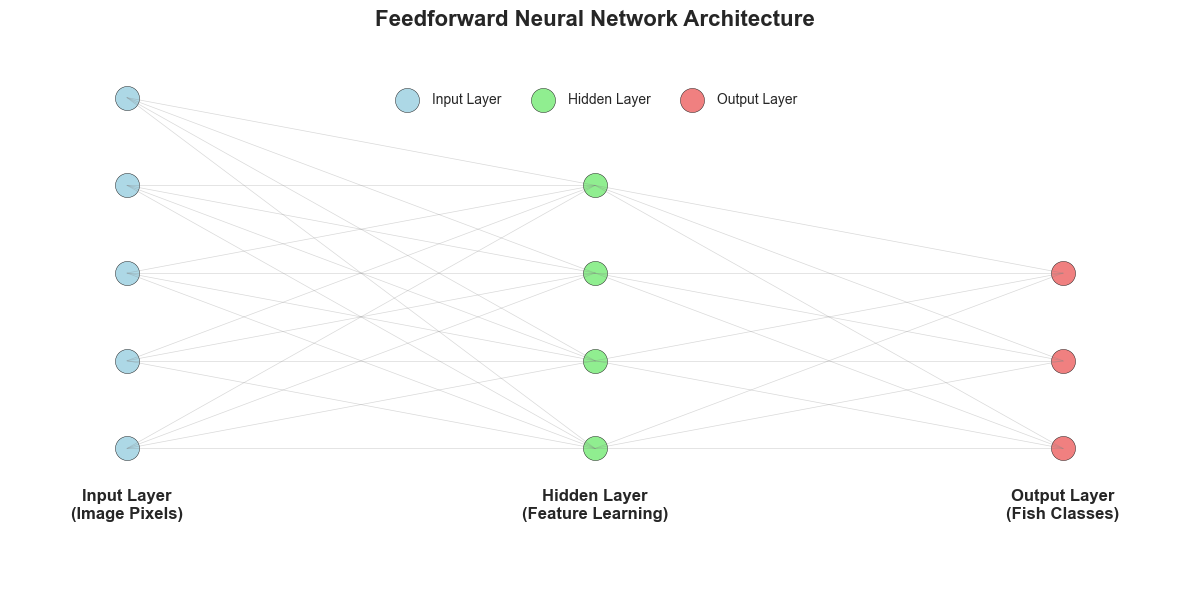

Data flows from left to right: Input → Hidden → Output


In [3]:
# Visualize FNN Architecture
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Define layer positions
input_layer = np.array([[1, i] for i in range(5)])    # 5 input neurons 
hidden_layer = np.array([[3, i] for i in range(4)])   # 4 hidden neurons
output_layer = np.array([[5, i] for i in range(3)])   # 3 output neurons 

# Draw connections
for i_node in input_layer:
    for h_node in hidden_layer:
        ax.plot([i_node[0], h_node[0]], [i_node[1], h_node[1]], 'gray', alpha=0.3, linewidth=0.5)

for h_node in hidden_layer:
    for o_node in output_layer:
        ax.plot([h_node[0], o_node[0]], [h_node[1], o_node[1]], 'gray', alpha=0.3, linewidth=0.5)

# Draw neurons
ax.scatter(input_layer[:, 0], input_layer[:, 1], s=300, c='lightblue', edgecolors='black', label='Input Layer')
ax.scatter(hidden_layer[:, 0], hidden_layer[:, 1], s=300, c='lightgreen', edgecolors='black', label='Hidden Layer')
ax.scatter(output_layer[:, 0], output_layer[:, 1], s=300, c='lightcoral', edgecolors='black', label='Output Layer')

# Add labels
ax.text(1, -0.8, 'Input Layer\n(Image Pixels)', ha='center', fontsize=12, fontweight='bold')
ax.text(3, -0.8, 'Hidden Layer\n(Feature Learning)', ha='center', fontsize=12, fontweight='bold')
ax.text(5, -0.8, 'Output Layer\n(Fish Classes)', ha='center', fontsize=12, fontweight='bold')

# Format plot
ax.set_xlim(0.5, 5.5)
ax.set_ylim(-1.5, 4.5)
ax.set_title('Feedforward Neural Network Architecture', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3)

plt.tight_layout()
plt.show()

print("Data flows from left to right: Input → Hidden → Output")


## Neuron Mathematics: The Core Computation

Each neuron performs two key operations:

### 1. **Linear Combination**
$$z = w^T x + b$$

Where:
- **x**: input vector (from previous layer)
- **w**: weight vector (learned parameters)
- **b**: bias term (learned parameter)
- **z**: pre-activation output

### 2. **Non-linear Activation**
$$a = \phi(z)$$

Where:
- **φ**: activation function (introduces non-linearity)
- **a**: final neuron output (activation)

### **Full Layer Computation**
$$a^{[l]} = \phi(W^{[l]} a^{[l-1]} + b^{[l]})$$


In [5]:
# Demonstrate neuron computation with simple example
print("Neuron Computation Example")
print("=" * 40)

# Example inputs
x = np.array([0.8, 0.6, 0.9, 0.2])  # Example: [brightness, texture, shape, size]
print(f"Input features (x): {x}")

# Random weights and bias
w = np.array([0.5, -0.3, 0.8, 0.1])
b = 0.2
print(f"Weights (w): {w}")
print(f"Bias (b): {b}")

# Step 1: Linear combination
z = np.dot(w, x) + b
print(f"\nStep 1 - Linear combination:")
print(f"z = w^T * x + b = {z:.3f}")

# Step 2: Apply activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

a = relu(z)
print(f"\nStep 2 - Activation (ReLU):")
print(f"a = ReLU(z) = max(0, {z:.3f}) = {a:.3f}")

print(f"\nFinal neuron output: {a:.3f}")
print("This output becomes input to the next layer!")


Neuron Computation Example
Input features (x): [0.8 0.6 0.9 0.2]
Weights (w): [ 0.5 -0.3  0.8  0.1]
Bias (b): 0.2

Step 1 - Linear combination:
z = w^T * x + b = 1.160

Step 2 - Activation (ReLU):
a = ReLU(z) = max(0, 1.160) = 1.160

Final neuron output: 1.160
This output becomes input to the next layer!


## Activation Functions: Adding Non-linearity

Activation functions introduce **non-linearity** to the network, enabling it to learn complex patterns.

### Key Activation Functions:

| Function | Formula | Use Case |
|----------|---------|----------|
| **ReLU** | φ(z) = max(0, z) | Hidden layers (most common) |
| **Sigmoid** | φ(z) = 1/(1 + e^-z) | Binary classification output |
| **Softmax** | φ(z_i) = e^z_i / Σe^z_j | Multi-class classification output |

**Why Non-linearity?** Without activation functions, multiple layers would just be linear transformations!


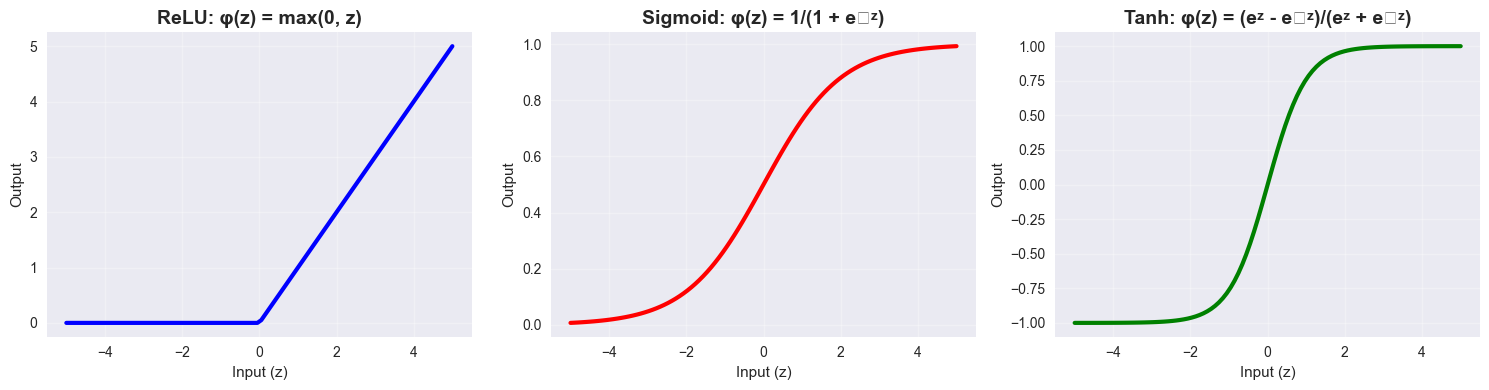

Key Points:
• ReLU: Outputs 0 for negative inputs, preserves positive inputs
• Sigmoid: Squashes values to (0,1) range - good for probabilities
• Tanh: Squashes values to (-1,1) range - zero-centered


In [6]:
# Visualize key activation functions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Generate input range
z = np.linspace(-5, 5, 100)

# 1. ReLU
relu_output = np.maximum(0, z)
axes[0].plot(z, relu_output, 'b-', linewidth=3, label='ReLU')
axes[0].set_title('ReLU: φ(z) = max(0, z)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Input (z)')
axes[0].set_ylabel('Output')

# 2. Sigmoid
sigmoid_output = 1 / (1 + np.exp(-z))
axes[1].plot(z, sigmoid_output, 'r-', linewidth=3, label='Sigmoid')
axes[1].set_title('Sigmoid: φ(z) = 1/(1 + e⁻ᶻ)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Input (z)')
axes[1].set_ylabel('Output')

# 3. Tanh (as bonus)
tanh_output = np.tanh(z)
axes[2].plot(z, tanh_output, 'g-', linewidth=3, label='Tanh')
axes[2].set_title('Tanh: φ(z) = (eᶻ - e⁻ᶻ)/(eᶻ + e⁻ᶻ)', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('Input (z)')
axes[2].set_ylabel('Output')

plt.tight_layout()
plt.show()

print("Key Points:")
print("• ReLU: Outputs 0 for negative inputs, preserves positive inputs")
print("• Sigmoid: Squashes values to (0,1) range - good for probabilities")
print("• Tanh: Squashes values to (-1,1) range - zero-centered")


## Building a Simple FNN for Fish Classification

1. **Input**: Fish image features
2. **Hidden Layer**: ReLU activation
3. **Output**: Softmax for 9 fish classes


In [7]:
# Simple FNN Implementation
class SimpleFNN:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize FNN with random weights
        
        Args:
            input_size: Number of input features
            hidden_size: Number of hidden neurons
            output_size: Number of output classes (9 fish types)
        """
        # Initialize weights and biases randomly
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))
    
    def relu(self, z):
        """ReLU activation function"""
        return np.maximum(0, z)
    
    def softmax(self, z):
        """Softmax activation for output layer"""
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        """
        Forward propagation through the network
        
        Args:
            X: Input data (batch_size, input_size)
        
        Returns:
            Output probabilities (batch_size, output_size)
        """
        # Hidden layer: a^[1] = ReLU(W^[1] * x + b^[1])
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Output layer: a^[2] = Softmax(W^[2] * a^[1] + b^[2])
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        
        return self.a2

# Create network architecture
input_features = 10
hidden_neurons = 6
output_classes = 9

# Initialize the network
fnn = SimpleFNN(input_features, hidden_neurons, output_classes)

print(" FNN Architecture Created:")
print(f"   Input Layer:  {input_features} neurons (image features)")
print(f"   Hidden Layer: {hidden_neurons} neurons (ReLU activation)")
print(f"   Output Layer: {output_classes} neurons (Softmax activation)")
print(f"\nTotal Parameters: {fnn.W1.size + fnn.b1.size + fnn.W2.size + fnn.b2.size}")


 FNN Architecture Created:
   Input Layer:  10 neurons (image features)
   Hidden Layer: 6 neurons (ReLU activation)
   Output Layer: 9 neurons (Softmax activation)

Total Parameters: 129


In [8]:
# Demonstrate FNN Forward Propagation
print("FNN Forward Propagation Demo")
print("=" * 50)

# Create sample input data
np.random.seed(42)
sample_features = np.random.rand(3, 10)

print("Sample Input Features (3 fish images):")
for i, features in enumerate(sample_features):
    print(f"Fish {i+1}: {features[:5].round(3)}... (showing first 5 features)")

# Forward propagation
print(f"\nForward Propagation Process:")
print(f"1. Input shape: {sample_features.shape}")

# Run through the network
predictions = fnn.forward(sample_features)

print(f"2. Hidden layer output shape: {fnn.a1.shape}")
print(f"3. Final output shape: {predictions.shape}")

print(f"\nClassification Probabilities:")
fish_classes = ['Gilt-Head Bream', 'Red Sea Bream', 'Sea Bass', 'Red Mullet', 
                'Horse Mackerel', 'Black Sea Sprat', 'Striped Red Mullet', 'Trout', 'Shrimp']

for i, prob in enumerate(predictions):
    predicted_class = np.argmax(prob)
    confidence = prob[predicted_class]
    print(f"Fish {i+1}: Predicted = {fish_classes[predicted_class]} (Confidence: {confidence:.3f})")
    
print(f"\nEach output sums to 1.0 (probability distribution):")
for i, prob in enumerate(predictions):
    print(f"Fish {i+1} probabilities sum: {np.sum(prob):.6f}")


FNN Forward Propagation Demo
Sample Input Features (3 fish images):
Fish 1: [0.375 0.951 0.732 0.599 0.156]... (showing first 5 features)
Fish 2: [0.021 0.97  0.832 0.212 0.182]... (showing first 5 features)
Fish 3: [0.612 0.139 0.292 0.366 0.456]... (showing first 5 features)

Forward Propagation Process:
1. Input shape: (3, 10)
2. Hidden layer output shape: (3, 6)
3. Final output shape: (3, 9)

Classification Probabilities:
Fish 1: Predicted = Black Sea Sprat (Confidence: 0.116)
Fish 2: Predicted = Black Sea Sprat (Confidence: 0.118)
Fish 3: Predicted = Gilt-Head Bream (Confidence: 0.114)

Each output sums to 1.0 (probability distribution):
Fish 1 probabilities sum: 1.000000
Fish 2 probabilities sum: 1.000000
Fish 3 probabilities sum: 1.000000


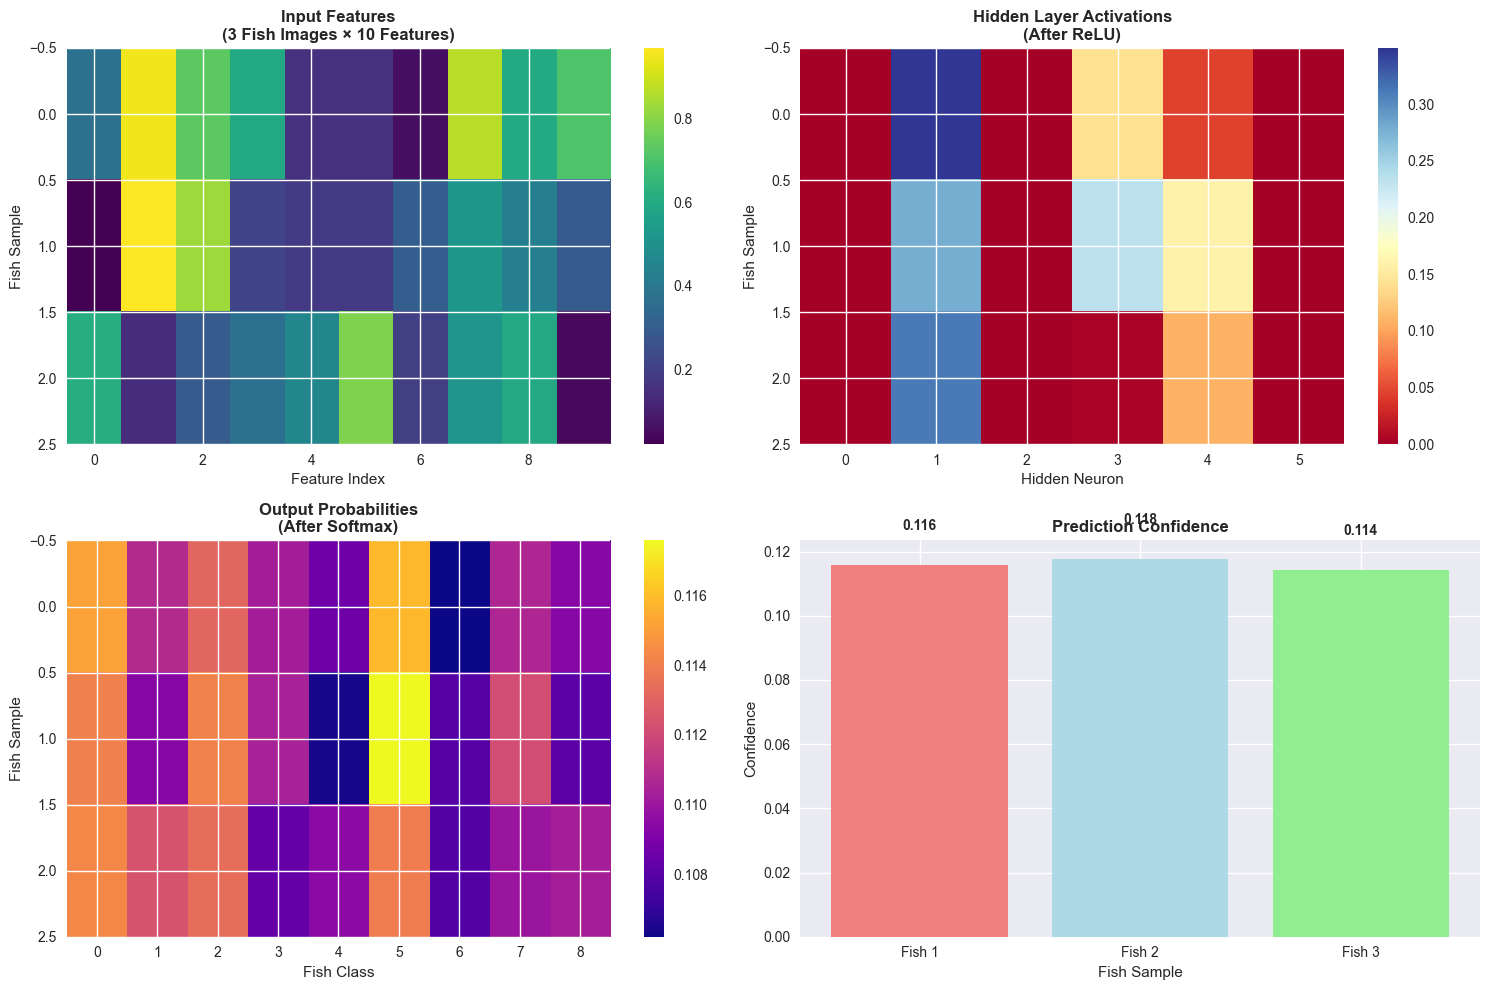

Information Flow Visualization:
• Top-left: Raw input features
• Top-right: Hidden layer activations (learned features)
• Bottom-left: Final output probabilities
• Bottom-right: Prediction confidence levels


In [9]:
# Visualize information flow through the network
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Input features heatmap
im1 = axes[0,0].imshow(sample_features, cmap='viridis', aspect='auto')
axes[0,0].set_title('Input Features\n(3 Fish Images × 10 Features)', fontweight='bold')
axes[0,0].set_xlabel('Feature Index')
axes[0,0].set_ylabel('Fish Sample')
plt.colorbar(im1, ax=axes[0,0])

# 2. Hidden layer activations
im2 = axes[0,1].imshow(fnn.a1, cmap='RdYlBu', aspect='auto')
axes[0,1].set_title('Hidden Layer Activations\n(After ReLU)', fontweight='bold')
axes[0,1].set_xlabel('Hidden Neuron')
axes[0,1].set_ylabel('Fish Sample')
plt.colorbar(im2, ax=axes[0,1])

# 3. Output probabilities
im3 = axes[1,0].imshow(predictions, cmap='plasma', aspect='auto')
axes[1,0].set_title('Output Probabilities\n(After Softmax)', fontweight='bold')
axes[1,0].set_xlabel('Fish Class')
axes[1,0].set_ylabel('Fish Sample')
plt.colorbar(im3, ax=axes[1,0])

# 4. Prediction confidence bar chart
predicted_classes = np.argmax(predictions, axis=1)
confidences = np.max(predictions, axis=1)
colors = ['lightcoral', 'lightblue', 'lightgreen']

bars = axes[1,1].bar(range(3), confidences, color=colors)
axes[1,1].set_title('Prediction Confidence', fontweight='bold')
axes[1,1].set_xlabel('Fish Sample')
axes[1,1].set_ylabel('Confidence')
axes[1,1].set_xticks(range(3))
axes[1,1].set_xticklabels([f'Fish {i+1}' for i in range(3)])

# Add confidence values on bars
for i, (bar, conf) in enumerate(zip(bars, confidences)):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{conf:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Information Flow Visualization:")
print("• Top-left: Raw input features")
print("• Top-right: Hidden layer activations (learned features)")
print("• Bottom-left: Final output probabilities") 
print("• Bottom-right: Prediction confidence levels")


## What is the Model Actually Doing?

The visualization above shows us the **transformation journey** of our data through the FNN. But here is some important questions:

### **Question 1**: Why do the input features look so random and colorful?

**Answer**: The input features represent **extracted characteristics** from fish images. Let's see what each feature might represent:


Understanding Input Features


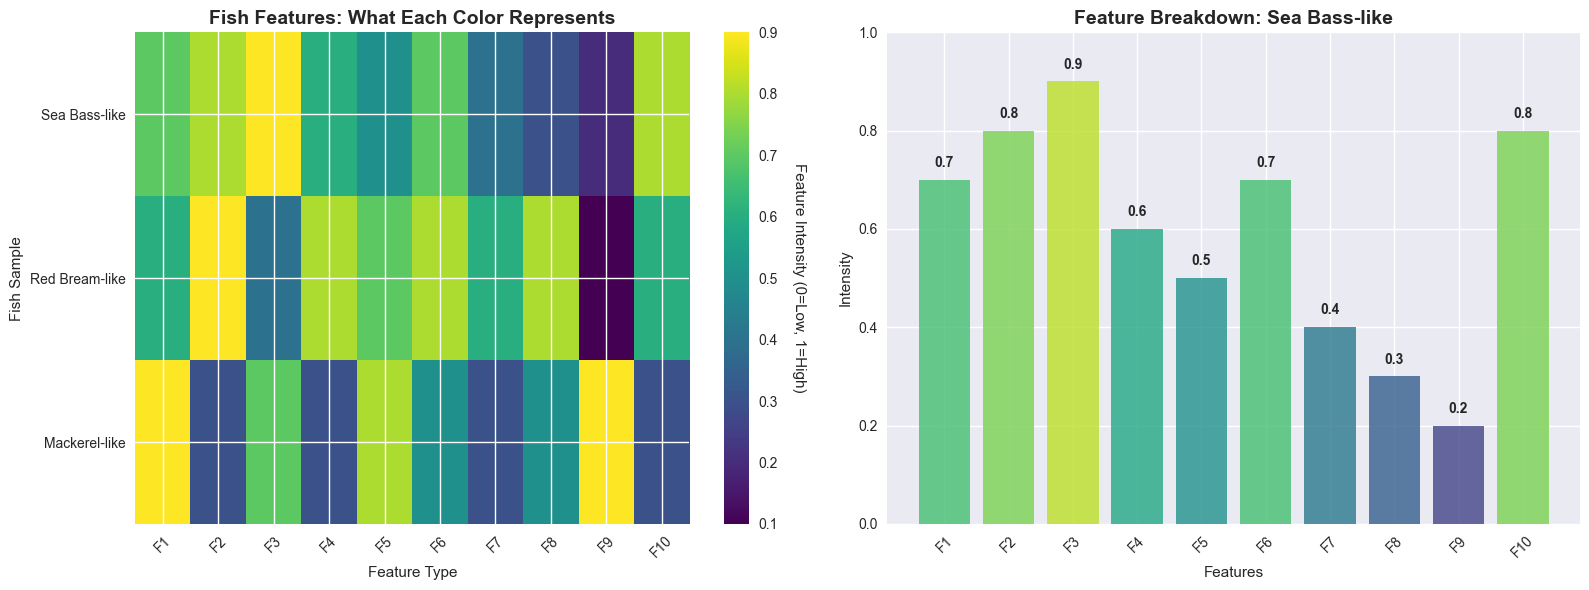


Feature Meanings:
F 1 - Average Brightness  : 0.7 (High)
F 2 - Color Intensity     : 0.8 (High)
F 3 - Body Length/Width Ratio: 0.9 (High)
F 4 - Fin Size            : 0.6 (Medium)
F 5 - Scale Texture       : 0.5 (Medium)
F 6 - Head Size           : 0.7 (High)
F 7 - Eye Size            : 0.4 (Medium)
F 8 - Body Curve          : 0.3 (Low)
F 9 - Stripe Pattern      : 0.2 (Low)
F10 - Overall Size        : 0.8 (High)

Key Insight: Each fish has a unique 'fingerprint' of features!
   The network learns to recognize these patterns to classify fish types.


In [11]:
# Let's create more meaningful input features to understand what they represent
print("Understanding Input Features")
print("=" * 60)

# Define what each feature represents
feature_names = [
    'Average Brightness', 'Color Intensity', 'Body Length/Width Ratio', 'Fin Size',
    'Scale Texture', 'Head Size', 'Eye Size', 'Body Curve', 'Stripe Pattern', 'Overall Size'
]

# Create more realistic fish features for 3 different fish types
np.random.seed(42)
realistic_features = np.array([
    # Fish 1: Bright, elongated fish (like Sea Bass)
    [0.7, 0.8, 0.9, 0.6, 0.5, 0.7, 0.4, 0.3, 0.2, 0.8],
    
    # Fish 2: Round, colorful fish (like Red Sea Bream)  
    [0.6, 0.9, 0.4, 0.8, 0.7, 0.8, 0.6, 0.8, 0.1, 0.6],
    
    # Fish 3: Small, silver fish (like Horse Mackerel)
    [0.9, 0.3, 0.7, 0.3, 0.8, 0.5, 0.3, 0.5, 0.9, 0.3]
])

# Visualize what each feature means
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap of features
im = ax1.imshow(realistic_features, cmap='viridis', aspect='auto')
ax1.set_title('Fish Features: What Each Color Represents', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature Type')
ax1.set_ylabel('Fish Sample')
ax1.set_xticks(range(10))
ax1.set_xticklabels([f'F{i+1}' for i in range(10)], rotation=45)
ax1.set_yticks(range(3))
ax1.set_yticklabels(['Sea Bass-like', 'Red Bream-like', 'Mackerel-like'])

# Add colorbar
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Feature Intensity (0=Low, 1=High)', rotation=270, labelpad=20)

# Bar chart showing feature interpretation for one fish
fish_idx = 0  # Sea Bass-like fish
bars = ax2.bar(range(10), realistic_features[fish_idx], 
               color=plt.cm.viridis(realistic_features[fish_idx]), alpha=0.8)
ax2.set_title(f'Feature Breakdown: {["Sea Bass-like", "Red Bream-like", "Mackerel-like"][fish_idx]}', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Features')
ax2.set_ylabel('Intensity')
ax2.set_xticks(range(10))
ax2.set_xticklabels([f'F{i+1}' for i in range(10)], rotation=45)
ax2.set_ylim(0, 1)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, realistic_features[fish_idx])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nFeature Meanings:")
for i, (name, val) in enumerate(zip(feature_names, realistic_features[fish_idx])):
    intensity = "High" if val > 0.6 else "Medium" if val > 0.3 else "Low"
    print(f"F{i+1:2d} - {name:20s}: {val:.1f} ({intensity})")

print(f"\nKey Insight: Each fish has a unique 'fingerprint' of features!")
print(f"   The network learns to recognize these patterns to classify fish types.")


### **Question 2**: How does the hidden layer "learn" different patterns?

**Answer**: Each hidden neuron acts like a **feature detector**. Let's see what each neuron is "looking for":


Hidden Layer Analysis - What is each neuron detecting?
Weight Analysis - What each hidden neuron cares about:

Hidden Neuron 1: Detects: Average Brightness, Color Intensity
 Average Brightness: 0.106
 Color Intensity: -0.130
 Head Size: -0.166

Hidden Neuron 2: Detects: Body Curve, Head Size
 Body Curve: 0.115
 Head Size: 0.150
 Body Length/Width Ratio: 0.152

Hidden Neuron 3: Detects: Color Intensity, Eye Size
 Color Intensity: -0.093
 Eye Size: -0.162
 Scale Texture: -0.212

Hidden Neuron 4: Detects: Eye Size, Overall Size
 Eye Size: 0.093
 Overall Size: -0.119
 Color Intensity: 0.202

Hidden Neuron 5: Detects: Body Curve, Head Size
 Body Curve: -0.173
 Head Size: 0.182
 Body Length/Width Ratio: 0.214

Hidden Neuron 6: Detects: Color Intensity, Fin Size
 Color Intensity: -0.115
 Fin Size: -0.154
 Head Size: -0.176



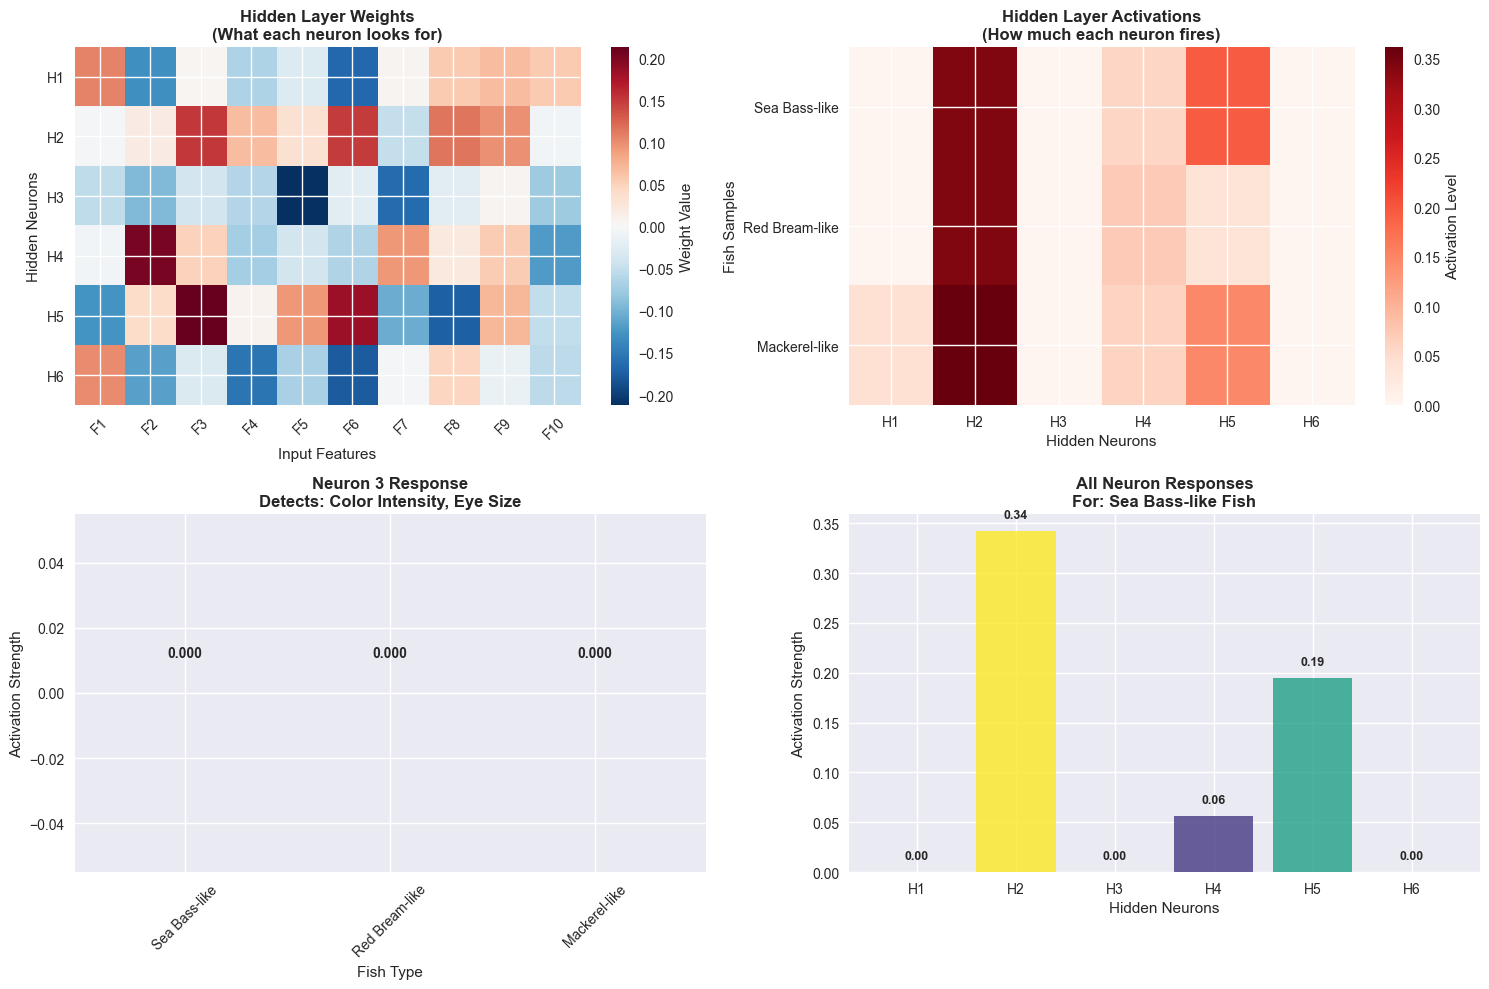

Key Insights:
• Each hidden neuron acts as a specialized 'feature detector'
• Different fish types activate different combinations of neurons
• Some neurons fire strongly (high activation) for certain fish characteristics
• The pattern of activations creates a unique 'neural signature' for each fish type


In [13]:
# Let's analyze what each hidden neuron is "looking for"
print("Hidden Layer Analysis - What is each neuron detecting?")
print("=" * 60)

# Use our realistic features and run them through the network
realistic_predictions = fnn.forward(realistic_features)

# Examine the weights connecting input to hidden layer
print("Weight Analysis - What each hidden neuron cares about:")
print()

# Create interpretable neuron names based on weight patterns
neuron_interpretations = []
for neuron_idx in range(fnn.W1.shape[1]):
    weights = fnn.W1[:, neuron_idx]
    
    # Find which input features this neuron responds to most
    top_features = np.argsort(np.abs(weights))[-3:]  # Top 3 features
    feature_importance = [(feature_names[i], weights[i]) for i in top_features]
    
    # Create interpretation based on dominant features
    dominant_features = [name for name, weight in feature_importance if abs(weight) > 0.05]
    if len(dominant_features) > 0:
        interpretation = f"Detects: {', '.join(dominant_features[:2])}"
    else:
        interpretation = "General pattern detector"
    
    neuron_interpretations.append(interpretation)
    
    print(f"Hidden Neuron {neuron_idx+1}: {interpretation}")
    for name, weight in feature_importance:
        print(f" {name}: {weight:.3f}")
    print()

# Now visualize how different fish activate different neurons
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Hidden layer weights heatmap
im1 = axes[0,0].imshow(fnn.W1.T, cmap='RdBu_r', aspect='auto')
axes[0,0].set_title('Hidden Layer Weights\n(What each neuron looks for)', fontweight='bold')
axes[0,0].set_xlabel('Input Features')
axes[0,0].set_ylabel('Hidden Neurons')
axes[0,0].set_xticks(range(10))
axes[0,0].set_xticklabels([f'F{i+1}' for i in range(10)], rotation=45)
axes[0,0].set_yticks(range(6))
axes[0,0].set_yticklabels([f'H{i+1}' for i in range(6)])
plt.colorbar(im1, ax=axes[0,0], label='Weight Value')

# 2. Hidden activations for realistic features
im2 = axes[0,1].imshow(fnn.a1, cmap='Reds', aspect='auto')
axes[0,1].set_title('Hidden Layer Activations\n(How much each neuron fires)', fontweight='bold')
axes[0,1].set_xlabel('Hidden Neurons')
axes[0,1].set_ylabel('Fish Samples')
axes[0,1].set_xticks(range(6))
axes[0,1].set_xticklabels([f'H{i+1}' for i in range(6)])
axes[0,1].set_yticks(range(3))
axes[0,1].set_yticklabels(['Sea Bass-like', 'Red Bream-like', 'Mackerel-like'])
plt.colorbar(im2, ax=axes[0,1], label='Activation Level')

# 3. Individual neuron responses
neuron_to_analyze = 2  # Choose an interesting neuron
activations_for_neuron = fnn.a1[:, neuron_to_analyze]
bars = axes[1,0].bar(range(3), activations_for_neuron, 
                     color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
axes[1,0].set_title(f'Neuron {neuron_to_analyze+1} Response\n{neuron_interpretations[neuron_to_analyze]}', 
                    fontweight='bold')
axes[1,0].set_xlabel('Fish Type')
axes[1,0].set_ylabel('Activation Strength')
axes[1,0].set_xticks(range(3))
axes[1,0].set_xticklabels(['Sea Bass-like', 'Red Bream-like', 'Mackerel-like'], rotation=45)

# Add activation values on bars
for i, (bar, val) in enumerate(zip(bars, activations_for_neuron)):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Compare activations across all neurons for one fish
fish_to_analyze = 0  # Sea Bass-like
neuron_activations = fnn.a1[fish_to_analyze, :]
bars = axes[1,1].bar(range(6), neuron_activations, 
                     color=plt.cm.viridis(neuron_activations/max(neuron_activations)), alpha=0.8)
axes[1,1].set_title(f'All Neuron Responses\nFor: Sea Bass-like Fish', fontweight='bold')
axes[1,1].set_xlabel('Hidden Neurons')
axes[1,1].set_ylabel('Activation Strength')
axes[1,1].set_xticks(range(6))
axes[1,1].set_xticklabels([f'H{i+1}' for i in range(6)])

# Add activation values on bars
for i, (bar, val) in enumerate(zip(bars, neuron_activations)):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("Key Insights:")
print(f"• Each hidden neuron acts as a specialized 'feature detector'")
print(f"• Different fish types activate different combinations of neurons")
print(f"• Some neurons fire strongly (high activation) for certain fish characteristics")
print(f"• The pattern of activations creates a unique 'neural signature' for each fish type")


### **Question 3**: Why do some neurons activate more than others?

**Answer**: Neuron activation depends on how well the input **matches** what the neuron is "looking for". Let's see this in action:


Step-by-Step Neuron Activation Analysis
Analyzing: Sea Bass-like fish
Input features: [0.7 0.8 0.9 0.6 0.5 0.7 0.4 0.3 0.2 0.8]

Manual Computation for Each Hidden Neuron:

Hidden Neuron 1:
  Weights: [ 0.10582153 -0.12972864  0.00519607 -0.06449665 -0.0279807  -0.16568233
  0.00703335  0.05684899  0.06689591  0.05741791]
  Bias: 0.000
  Linear combination (z): -0.115
  After ReLU: 0.000
  NO activation (ReLU killed negative value)

Hidden Neuron 2:
  Weights: [-0.00248502  0.0179185   0.15196554  0.06742458  0.03366989  0.1498933
 -0.05006715  0.11523681  0.0987255  -0.00449975]
  Bias: 0.000
  Linear combination (z): 0.342
  After ReLU: 0.342
  HIGH activation because:
    • Body Length/Width Ratio (0.90) × 0.152 = 0.137
    • Fin Size (0.60) × 0.067 = 0.040
    • Head Size (0.70) × 0.150 = 0.105
    • Body Curve (0.30) × 0.115 = 0.035
    • Stripe Pattern (0.20) × 0.099 = 0.020

Hidden Neuron 3:
  Weights: [-0.05275989 -0.09330593 -0.03774669 -0.0618434  -0.21190367 -0.0214998
 -0.1

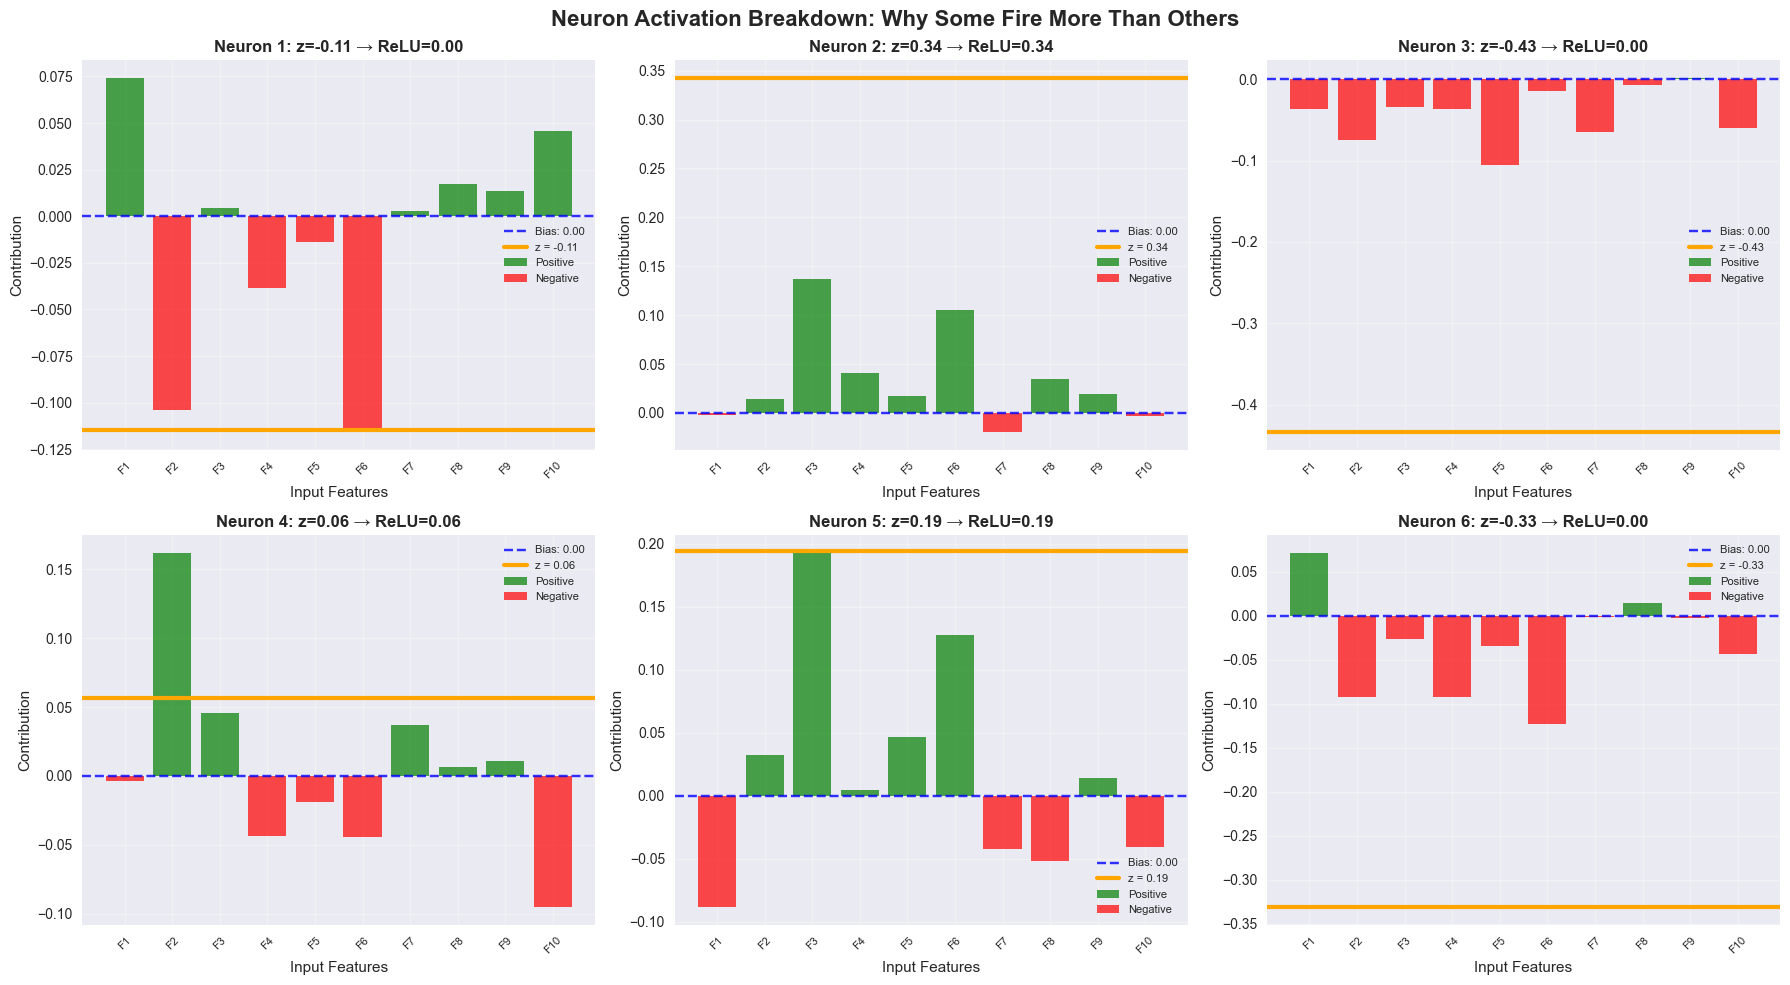

Why Neurons Activate Differently:
• Positive contributions (green) INCREASE activation
• Negative contributions (red) DECREASE activation
• Bias shifts the baseline up or down
• ReLU clips negative results to zero
• Each neuron has learned to respond to different feature combinations


In [14]:
# Let's trace through the exact computation for one fish to see why neurons activate differently
print("Step-by-Step Neuron Activation Analysis")
print("=" * 60)

# Pick the Sea Bass-like fish (index 0)
fish_sample = realistic_features[0]
print(f"Analyzing: Sea Bass-like fish")
print(f"Input features: {fish_sample}")
print()

# Let's manually compute what happens in each hidden neuron
print("Manual Computation for Each Hidden Neuron:")
print()

for neuron_idx in range(fnn.W1.shape[1]):
    print(f"Hidden Neuron {neuron_idx + 1}:")
    
    # Get the weights for this neuron
    weights = fnn.W1[:, neuron_idx]
    bias = fnn.b1[0, neuron_idx]
    
    # Step 1: Linear combination (z = w^T * x + b)
    z_value = np.dot(weights, fish_sample) + bias
    
    # Step 2: ReLU activation
    activation = max(0, z_value)
    
    print(f"  Weights: {weights}")
    print(f"  Bias: {bias:.3f}")
    print(f"  Linear combination (z): {z_value:.3f}")
    print(f"  After ReLU: {activation:.3f}")
    
    # Explain why this activation level makes sense
    strong_positive_weights = [(i, w) for i, w in enumerate(weights) if w > 0.05]
    strong_negative_weights = [(i, w) for i, w in enumerate(weights) if w < -0.05]
    
    if activation > 0.1:
        print(f"  HIGH activation because:")
        for feat_idx, weight in strong_positive_weights:
            contribution = weight * fish_sample[feat_idx]
            print(f"    • {feature_names[feat_idx]} ({fish_sample[feat_idx]:.2f}) × {weight:.3f} = {contribution:.3f}")
    elif activation == 0:
        print(f"  NO activation (ReLU killed negative value)")
    else:
        print(f"  LOW activation")
    
    print()

# Visualize the computation process
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# For each neuron, show the computation breakdown
for neuron_idx in range(6):
    row = neuron_idx // 3
    col = neuron_idx % 3
    
    weights = fnn.W1[:, neuron_idx]
    bias = fnn.b1[0, neuron_idx]
    
    # Calculate contribution of each input feature
    contributions = weights * fish_sample
    z_value = np.sum(contributions) + bias
    final_activation = max(0, z_value)
    
    # Create stacked bar chart showing positive and negative contributions
    positive_contrib = np.where(contributions >= 0, contributions, 0)
    negative_contrib = np.where(contributions < 0, contributions, 0)
    
    x_pos = np.arange(len(contributions))
    bars1 = axes[row, col].bar(x_pos, positive_contrib, color='green', alpha=0.7, label='Positive')
    bars2 = axes[row, col].bar(x_pos, negative_contrib, color='red', alpha=0.7, label='Negative')
    
    # Add bias as a horizontal line
    axes[row, col].axhline(y=bias, color='blue', linestyle='--', alpha=0.8, label=f'Bias: {bias:.2f}')
    
    # Show final result
    axes[row, col].axhline(y=z_value, color='orange', linestyle='-', linewidth=3, 
                           label=f'z = {z_value:.2f}')
    
    axes[row, col].set_title(f'Neuron {neuron_idx+1}: z={z_value:.2f} → ReLU={final_activation:.2f}', 
                             fontweight='bold')
    axes[row, col].set_xlabel('Input Features')
    axes[row, col].set_ylabel('Contribution')
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels([f'F{i+1}' for i in range(10)], rotation=45, fontsize=8)
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Neuron Activation Breakdown: Why Some Fire More Than Others', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("Why Neurons Activate Differently:")
print("• Positive contributions (green) INCREASE activation")
print("• Negative contributions (red) DECREASE activation") 
print("• Bias shifts the baseline up or down")
print("• ReLU clips negative results to zero")
print("• Each neuron has learned to respond to different feature combinations")


### **Question 4**: How does the network make its final decision?

**Answer**: The output layer combines all hidden neuron signals and uses **Softmax** to create a probability distribution. Let's trace this final step:


Final Decision Making - From Hidden Activations to Fish Classification
Analyzing decision process for: Sea Bass-like
Hidden layer activations: [0.         0.34226875 0.         0.05667245 0.19452085 0.        ]

Step 1: Computing raw scores for each fish class

  Gilt-Head Bream     : 0.0139
  Red Sea Bream       : -0.0089
  Sea Bass            : 0.0140
  Red Mullet          : -0.0454
  Horse Mackerel      : -0.0454
  Black Sea Sprat     : 0.0236
  Striped Red Mullet  : -0.0433
  Trout               : -0.0204
  Shrimp              : -0.0308

Step 2: Converting raw scores to probabilities (Softmax)

  Gilt-Head Bream     : 0.0139 → exp(0.0139) = 0.9904 → 0.1144 (11.4%)
  Red Sea Bream       : -0.0089 → exp(-0.0089) = 0.9680 → 0.1119 (11.2%)
  Sea Bass            : 0.0140 → exp(0.0140) = 0.9904 → 0.1144 (11.4%)
  Red Mullet          : -0.0454 → exp(-0.0454) = 0.9334 → 0.1078 (10.8%)
  Horse Mackerel      : -0.0454 → exp(-0.0454) = 0.9333 → 0.1078 (10.8%)
  Black Sea Sprat     : 0.0236 → 

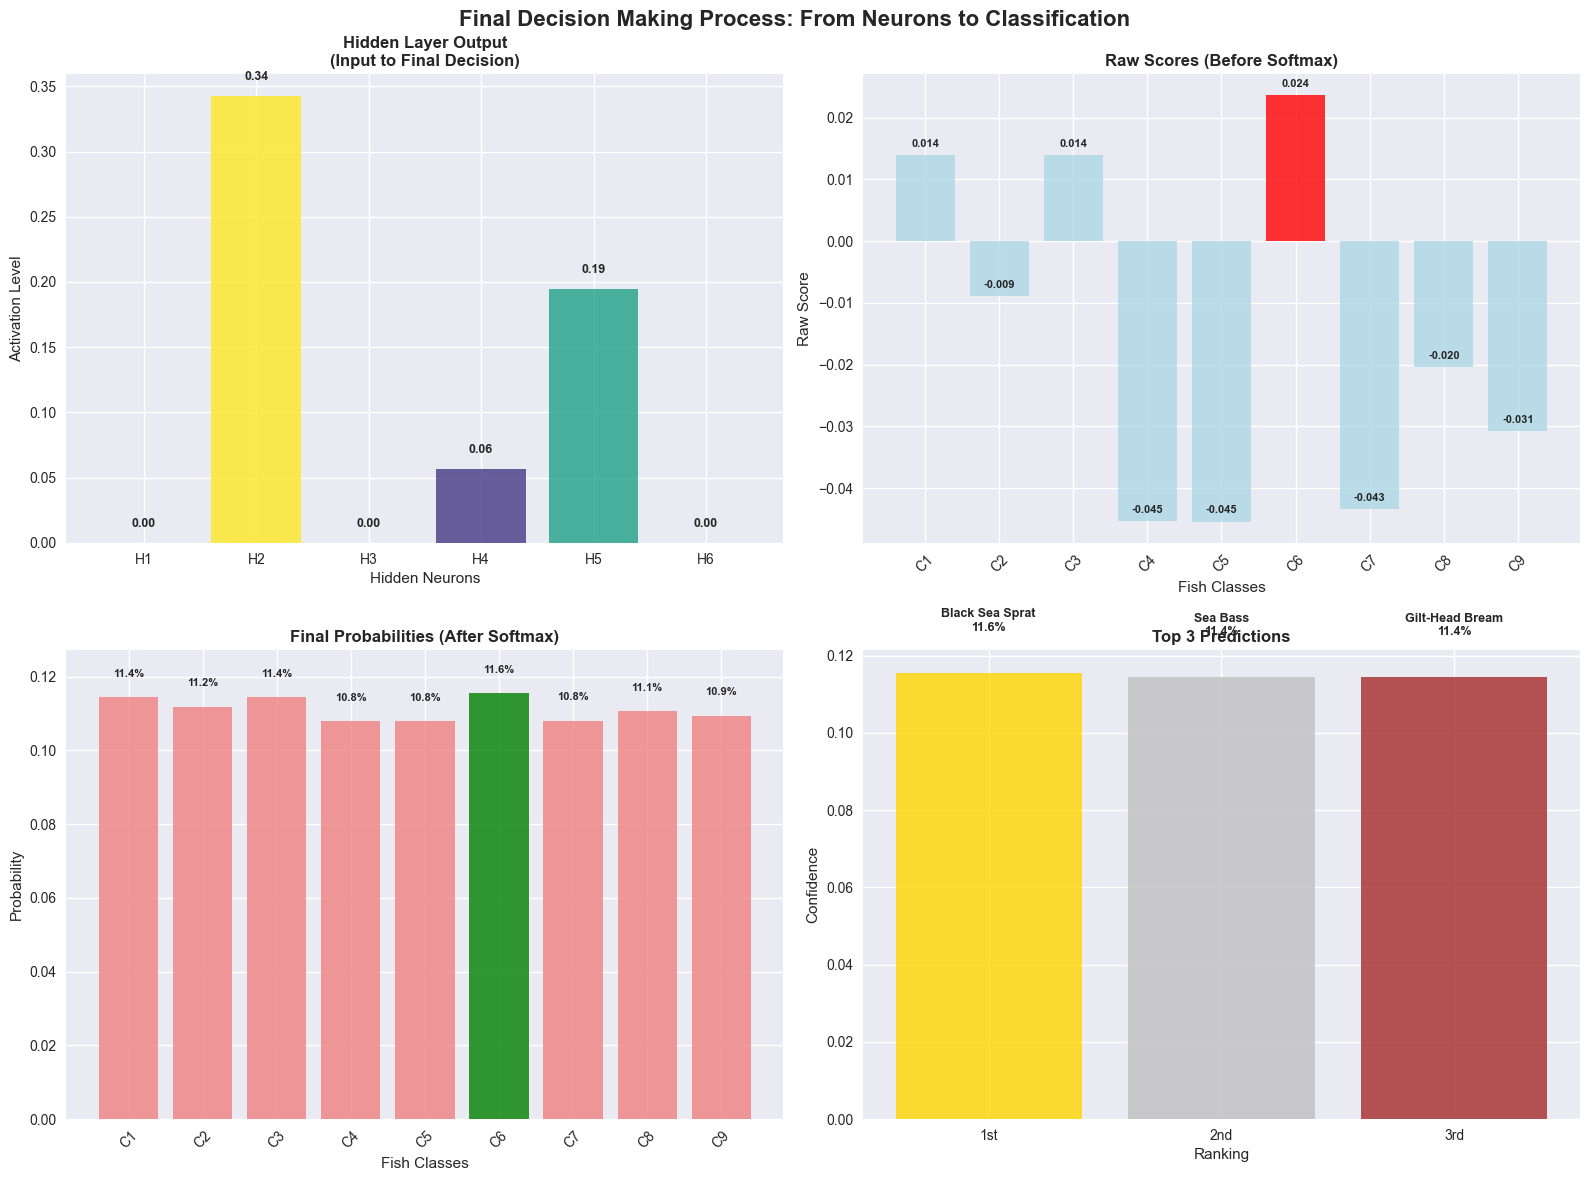

How the FNN Makes Its Final Decision:
1. Hidden neurons provide 'evidence' through their activations
2. Output layer combines evidence using learned weights
3. Raw scores show initial 'votes' for each fish class
4. Softmax converts scores to probabilities (0-1, sum=1)
5. Highest probability wins = Final prediction!

Key Insight: The network doesn't just give a yes/no answer—
   it provides confidence levels for ALL possible classes!


In [15]:
# Let's trace how the final decision is made
print("Final Decision Making - From Hidden Activations to Fish Classification")
print("=" * 70)

# Get the hidden layer activations for our Sea Bass-like fish
fish_idx = 0
hidden_activations = fnn.a1[fish_idx]  # This is what goes into the output layer
fish_name = "Sea Bass-like"

print(f"Analyzing decision process for: {fish_name}")
print(f"Hidden layer activations: {hidden_activations}")
print()

# Step 1: Linear combination for each output neuron (fish class)
print("Step 1: Computing raw scores for each fish class")
print()

output_raw_scores = []
for class_idx in range(9):  # 9 fish classes
    # Get weights from hidden layer to this output neuron
    weights_to_class = fnn.W2[:, class_idx]
    bias_for_class = fnn.b2[0, class_idx]
    
    # Calculate raw score: z = hidden_activations * weights + bias
    raw_score = np.dot(hidden_activations, weights_to_class) + bias_for_class
    output_raw_scores.append(raw_score)
    
    print(f"  {fish_classes[class_idx]:20s}: {raw_score:.4f}")

output_raw_scores = np.array(output_raw_scores)
print()

# Step 2: Apply Softmax to convert to probabilities
print("Step 2: Converting raw scores to probabilities (Softmax)")
print()

# Manual softmax computation for explanation
exp_scores = np.exp(output_raw_scores - np.max(output_raw_scores))  # Numerical stability
probabilities = exp_scores / np.sum(exp_scores)

for i, (class_name, raw_score, prob) in enumerate(zip(fish_classes, output_raw_scores, probabilities)):
    print(f"  {class_name:20s}: {raw_score:.4f} → exp({raw_score:.4f}) = {exp_scores[i]:.4f} → {prob:.4f} ({prob*100:.1f}%)")

print(f"\nSum of probabilities: {np.sum(probabilities):.6f} (should be 1.0)")
print()

# Final prediction
predicted_class_idx = np.argmax(probabilities)
confidence = probabilities[predicted_class_idx]
print(f"FINAL PREDICTION: {fish_classes[predicted_class_idx]} (Confidence: {confidence:.1%})")

# Visualize the decision-making process
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Hidden activations that feed into output layer
bars1 = axes[0,0].bar(range(6), hidden_activations, 
                      color=plt.cm.viridis(hidden_activations/max(hidden_activations)), alpha=0.8)
axes[0,0].set_title(f'Hidden Layer Output\n(Input to Final Decision)', fontweight='bold')
axes[0,0].set_xlabel('Hidden Neurons')
axes[0,0].set_ylabel('Activation Level')
axes[0,0].set_xticks(range(6))
axes[0,0].set_xticklabels([f'H{i+1}' for i in range(6)])

# Add values on bars
for i, (bar, val) in enumerate(zip(bars1, hidden_activations)):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Raw scores before softmax
bars2 = axes[0,1].bar(range(9), output_raw_scores, 
                      color=['red' if i == predicted_class_idx else 'lightblue' for i in range(9)], alpha=0.8)
axes[0,1].set_title('Raw Scores (Before Softmax)', fontweight='bold')
axes[0,1].set_xlabel('Fish Classes')
axes[0,1].set_ylabel('Raw Score')
axes[0,1].set_xticks(range(9))
axes[0,1].set_xticklabels([f'C{i+1}' for i in range(9)], rotation=45)

# Add values on bars
for i, (bar, val) in enumerate(zip(bars2, output_raw_scores)):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                   f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 3. Final probabilities after softmax
bars3 = axes[1,0].bar(range(9), probabilities, 
                      color=['green' if i == predicted_class_idx else 'lightcoral' for i in range(9)], alpha=0.8)
axes[1,0].set_title('Final Probabilities (After Softmax)', fontweight='bold')
axes[1,0].set_xlabel('Fish Classes')
axes[1,0].set_ylabel('Probability')
axes[1,0].set_xticks(range(9))
axes[1,0].set_xticklabels([f'C{i+1}' for i in range(9)], rotation=45)
axes[1,0].set_ylim(0, max(probabilities) * 1.1)

# Add percentage labels on bars
for i, (bar, val) in enumerate(zip(bars3, probabilities)):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                   f'{val*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 4. Decision confidence visualization
top_3_indices = np.argsort(probabilities)[-3:][::-1]  # Top 3 predictions
top_3_probs = probabilities[top_3_indices]
top_3_names = [fish_classes[i] for i in top_3_indices]

bars4 = axes[1,1].bar(range(3), top_3_probs, 
                      color=['gold', 'silver', 'brown'], alpha=0.8)
axes[1,1].set_title('Top 3 Predictions', fontweight='bold')
axes[1,1].set_xlabel('Ranking')
axes[1,1].set_ylabel('Confidence')
axes[1,1].set_xticks(range(3))
axes[1,1].set_xticklabels(['1st', '2nd', '3rd'])

# Add fish names and percentages
for i, (bar, prob, name) in enumerate(zip(bars4, top_3_probs, top_3_names)):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{name}\n{prob*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.suptitle('Final Decision Making Process: From Neurons to Classification', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("How the FNN Makes Its Final Decision:")
print("1. Hidden neurons provide 'evidence' through their activations")
print("2. Output layer combines evidence using learned weights")
print("3. Raw scores show initial 'votes' for each fish class")
print("4. Softmax converts scores to probabilities (0-1, sum=1)")
print("5. Highest probability wins = Final prediction!")
print()
print("Key Insight: The network doesn't just give a yes/no answer—")
print("   it provides confidence levels for ALL possible classes!")


### 🔍 **The Complete Journey:**

1. **Input Features**: Each fish has a unique "fingerprint" of measurable characteristics
2. **Hidden Neurons**: Act as specialized "feature detectors" looking for specific patterns
3. **Activation Process**: Neurons fire based on how well inputs match their learned preferences
4. **Final Decision**: Output layer combines all evidence to make confident predictions

### **Mathematical Understanding:**
- **Linear Transformation**: `z = w^T x + b` (weighted sum + bias)
- **Non-linear Activation**: `a = φ(z)` (ReLU, Sigmoid, Softmax)
- **Information Flow**: Input → Hidden → Output (feedforward only)

### **Why This Works:**
- **Specialization**: Each neuron learns to detect different features
- **Combination**: Multiple simple detectors → complex pattern recognition
- **Probability**: Softmax gives confidence levels, not just hard decisions
- **Learning**: Weights adjust during training to improve accuracy

### **Real-World Impact:**
This same FNN principle powers:
- Image recognition (photos → object labels)
- Medical diagnosis (symptoms → disease probability)
- Speech recognition (audio → text)
- Recommendation systems (preferences → suggestions)

**Key Takeaway**: FNNs transform complex data into meaningful decisions through simple mathematical operations repeated across many specialized neurons!
